https://www.reneshbedre.com/blog/manova.html#test-manova-assumptions

Load dataset

In [1]:
library(tidyverse)
df=read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
head(df, 2)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.0 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 40 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): plant_var
dbl (2): height, canopy_vol

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


plant_var,height,canopy_vol
<chr>,<dbl>,<dbl>
A,20,0.7
A,22,0.8


Summary statistics and visualization of datasetPermalink
Get summary statistics based on each dependent variable,

In [2]:
# summary statistics for dependent variable height 
df %>% group_by(plant_var) %>%  summarise(n = n(), mean = mean(height), sd = sd(height))
# output
 

# summary statistics for dependent variable canopy_vol 
df %>% group_by(plant_var) %>%  summarise(n = n(), mean = mean(canopy_vol), sd = sd(canopy_vol))
# output
 

plant_var,n,mean,sd
<chr>,<int>,<dbl>,<dbl>
A,10,18.90,2.923088
B,10,16.54,1.920185
C,10,3.05,1.039498
D,10,9.35,2.106735


plant_var,n,mean,sd
<chr>,<int>,<dbl>,<dbl>
A,10,0.784,0.12130769
B,10,0.608,0.09681598
C,10,0.272,0.14327906
D,10,0.474,0.09453982


Visualize dataset,


Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




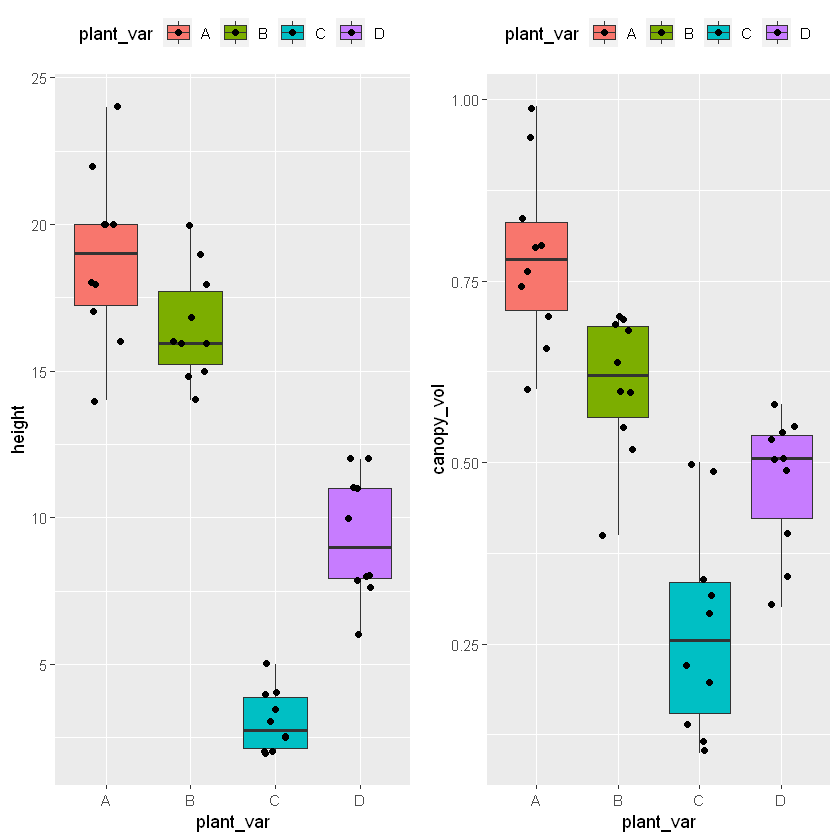

In [3]:
library(gridExtra)
p1 <- ggplot(df, aes(x = plant_var, y = height, fill = plant_var)) + geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2) + theme(legend.position="top")
p2 <- ggplot(df, aes(x = plant_var, y = canopy_vol, fill = plant_var)) + geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2) + theme(legend.position="top")
grid.arrange(p1, p2, ncol=2)

perform one-way MANOVA

In [4]:
dep_vars <- cbind(df$height, df$canopy_vol)
fit <- manova(dep_vars ~ plant_var, data = df)
summary(fit)
# output
         
# get effect size
library(effectsize)
effectsize::eta_squared(fit)
# output


          Df Pillai approx F num Df den Df    Pr(>F)    
plant_var  3 1.0365   12.909      6     72 7.575e-10 ***
Residuals 36                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
plant_var,0.5182515,0.95,0.3618079,1


The Pillai’s Trace test statistics is statistically significant [Pillai’s Trace = 1.03, F(6, 72) = 12.90, p < 0.001] and indicates that plant varieties has a statistically significant association with both combined plant height and canopy volume.

The measure of effect size (Partial Eta Squared; ηp2) is 0.52 and suggests that there is a large effect of plant varieties on both plant height and canopy volume.

post-hoc test
The MANOVA results suggest that there are statistically significant (p < 0.001) differences between plant varieties, but it does not tell which groups are different from each other. To know which groups are significantly different, the post-hoc test needs to carry out.

To test the between-group differences, the univariate ANOVA can be done on each dependent variable, but this will be not appropriate and lose information that can be obtained from multiple variables together.

Here we will perform the linear discriminant analysis (LDA) to see the differences between each group. LDA will discriminate the groups using information from both the dependent variables.

In [5]:
library(MASS)
post_hoc <- lda(df$plant_var ~ dep_vars, CV=F)
post_hoc
# output
Call:
lda(df$plant_var ~ dep_vars, CV = F)





# plot 
plot_lda <- data.frame(df[, "plant_var"], lda = predict(post_hoc)$x)
ggplot(plot_lda) + geom_point(aes(x = lda.LD1, y = lda.LD2, colour = plant_var), size = 4)


Caricamento pacchetto: 'MASS'


Il seguente oggetto è mascherato da 'package:dplyr':

    select




Call:
lda(df$plant_var ~ dep_vars, CV = F)

Prior probabilities of groups:
   A    B    C    D 
0.25 0.25 0.25 0.25 

Group means:
  dep_vars1 dep_vars2
A     18.90     0.784
B     16.54     0.608
C      3.05     0.272
D      9.35     0.474

Coefficients of linear discriminants:
                 LD1        LD2
dep_vars1 -0.4388374 -0.2751091
dep_vars2 -1.3949158  9.3256280

Proportion of trace:
   LD1    LD2 
0.9855 0.0145 

ERROR: Error in eval(expr, envir, enclos): oggetto 'Call' non trovato


The LDA scatter plot discriminates against multiple plant varieties based on the two dependent variables. The C and D plant variety has a significant difference (well separated) as compared to A and B. A and B plant varieties are more similar to each other. Overall, LDA discriminated between multiple plant varieties.

Test MANOVA assumptionsPermalink
Assumptions of multivariate normalityPermalink
This test may not be easy to test as it may not be available in all statistical software packages. You can initially check the univariate normality for each combination of the independent and dependent variables. If this test does not pass (significant p value), it may be possible that multivariate normality is violated.

Note: As per Multivariate Central Limit Theorem, if the sample size is large (say n > 20) for each combination of the independent and dependent variable, we can assume the assumptions of multivariate normality.

In [ ]:
library(rstatix)
df %>% group_by(plant_var) %>%  shapiro_test(height, canopy_vol)

As the p value is non-significant (p > 0.05) for each combination of independent and dependent variable, we fail to reject the null hypothesis and conclude that data follows univariate normality.

If the sample size is large (say n > 50), the visual approaches such as QQ-plot and histogram will be better for assessing the normality assumption. Read more here

Now, let’s check for multivariate normality using Mardia’s Skewness and Kurtosis test,

In [ ]:
library(mvnormalTest)
mardia(df[, c("height", "canopy_vol")])$mv.test

As the p value is non-significant (p > 0.05) for Mardia’s Skewness and Kurtosis test, we fail to reject the null hypothesis and conclude that data follows multivariate normality.

Here both Skewness and Kurtosis p value should be > 0.05 for concluding the multivariate normality.

Homogeneity of the variance-covariance matricesPermalink
We will use Box’s M test to assess the homogeneity of the variance-covariance matrices. Null hypothesis: variance-covariance matrices are equal for each combination formed by each group in the independent variable

In [ ]:
library(heplots)
boxM(Y = df[, c("height", "canopy_vol")], group = df$plant_var)
# output
	Box M-test for Homogeneity of Covariance Matrices

data:  df[, c("height", "canopy_vol")]
Chi-Sq (approx.) = 21.048, df = 9, p-value = 0.01244

As the p value is non-significant (p > 0.001) for Box’s M test, we fail to reject the null hypothesis and conclude that variance-covariance matrices are equal for each combination of dependent variable formed by each group in independent variable.

If this assumption fails, it would be good to check the homogeneity of variance assumption using Bartlett’s or Levene’s test to identify which variable fails in equal variance.

Multivariate outliersPermalink
MANOVA is highly sensitive to outliers and may produce type I or II errors. Multivariate outliers can be detected using the Mahalanobis Distance test. The larger the Mahalanobis Distance, the more likely it is an outlier.

In [ ]:
library(rstatix)
# get distance


From the results, there is no multivariate outliers (all is.outlier = FALSE or p > 0.001) in the dataset. If is.outlier = TRUE, it means there is multivariate outlier in the dataset.

Linearity assumptionPermalink
Linearity assumption can be checked by visualizing the pairwise scatterplot for the dependent variable for each group. The data points should lie on the straight line to meet the linearity assumption. The violation of the linearity assumption reduces the statistical power.

In [ ]:
library(gridExtra)
p1 <- df  %>% group_by(plant_var) %>% filter(plant_var == "A") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: A")
p2 <- df  %>% group_by(plant_var) %>% filter(plant_var == "B") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: B") 
p3 <- df  %>% group_by(plant_var) %>% filter(plant_var == "C") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: C") 
p4 <- df  %>% group_by(plant_var) %>% filter(plant_var == "D") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: D") 
grid.arrange(p1, p2, p3, p4, ncol=2)

The scatterplot indicates that dependent variables have a linear relationship for each group in the independent variable

Multicollinearity assumptionPermalink
Multicollinearity can be checked by correlation between the dependent variable. If you have more than two dependent variable you can use correlation matrix or variance inflation factor to assess the multicollinearity.

The correlation between the dependent variable should not be> 0.9 or too low. If the correlation is too low, you can perform separate univariate ANOVA for each dependent variable.

In [ ]:
cor.test(x = df$height, y = df$canopy_vol, method = "pearson")$estimate

As the correlation coefficient between the dependent variable is < 0.9, there is no multicollinearity.